In [1]:
import pandas as pd
pd.__version__

'1.1.1'

In [2]:
sGenes = pd.read_csv("sGenes.csv", header=0, index_col=0, quotechar='"', sep=",", na_values=["nan", "-", ".", " ", "", "NA"], delimiter=',')
sGenes.head()

,intron,AA,BB,A.pheno.mean,B.pheno.mean,effect,intron_chr,intron_start,intron_end,qtl_chr,...,qtl_regions(bp),GeneID,qtl_pos(cM),ci_lo(cM),ci_hi(cM),qtl_loc_pos,qtl_loc(ci_lo/hi),clusterID,qtl_type,additive_effect
2,1:10066484:10067155:clu_81585,45,91,-0.475814,0.122560,BB,1A,10066484,10067155,5A,...,5A:1109014:681212269,TraesCS1A02G020500,16.35176,0.0,24.79067,5A:16.35176,5A:0:24.79067,clu_81585,trans,0.299187
3,1:10066710:10067155:clu_81585,30,16,-0.431830,0.522408,BB,1A,10066710,10067155,7D,...,7D:103573419:113322585,TraesCS1A02G020500,73.70748,72.0,74.00000,7D:73.70748,7D:72:74,clu_81585,trans,0.477119
13,1:103324205:103324276:clu_82215,0,1,NaN,-3.589248,NaN,1A,103324205,103324276,6B,...,6B:NA:NA,TraesCS1A02G106100,111.00000,111.0,111.00000,6B:111,6B:111:111,clu_82215,trans,NaN
14,1:103324205:103324276:clu_82215,0,3,NaN,-1.921536,NaN,1A,103324205,103324276,5B,...,5B:NA:NA,TraesCS1A02G106100,20.00000,20.0,20.00000,5B:20,5B:20:20,clu_82215,trans,NaN
15,1:103324205:103324276:clu_82215,1,5,0.354840,-1.043190,AA,1A,103324205,103324276,2A,...,2A:371904:543454724,TraesCS1A02G106100,58.00000,0.0,87.97407,2A:58,2A:0:87.97407,clu_82215,trans,0.699015


In [3]:
sGenes.shape

(11249, 24)

In [4]:
# I needed a file which has geneIDs to retrieve the homoeolog genes from Biomart
sGenes.GeneID.to_csv('sgenes.txt', index=False)
#for i in sGenes.GeneID.unique():
    #print(i)

In [5]:
sGenes.dtypes

intron                 object
AA                      int64
BB                      int64
A.pheno.mean          float64
B.pheno.mean          float64
effect                 object
intron_chr             object
intron_start            int64
intron_end              int64
qtl_chr                object
qtl_start(bp)         float64
qtl_end(bp)           float64
lod                   float64
intron_regions(bp)     object
qtl_regions(bp)        object
GeneID                 object
qtl_pos(cM)           float64
ci_lo(cM)             float64
ci_hi(cM)             float64
qtl_loc_pos            object
qtl_loc(ci_lo/hi)      object
clusterID              object
qtl_type               object
additive_effect       float64
dtype: object

In [6]:
sGenes.isnull().sum()

intron                   0
AA                       0
BB                       0
A.pheno.mean           484
B.pheno.mean             0
effect                 484
intron_chr               0
intron_start             0
intron_end               0
qtl_chr                  0
qtl_start(bp)         1104
qtl_end(bp)           1104
lod                      0
intron_regions(bp)       0
qtl_regions(bp)          0
GeneID                   0
qtl_pos(cM)              0
ci_lo(cM)                0
ci_hi(cM)                0
qtl_loc_pos              0
qtl_loc(ci_lo/hi)        0
clusterID                0
qtl_type               173
additive_effect        484
dtype: int64

In [7]:
sGenes = sGenes.fillna("NA")
sGenes

,intron,AA,BB,A.pheno.mean,B.pheno.mean,effect,intron_chr,intron_start,intron_end,qtl_chr,...,qtl_regions(bp),GeneID,qtl_pos(cM),ci_lo(cM),ci_hi(cM),qtl_loc_pos,qtl_loc(ci_lo/hi),clusterID,qtl_type,additive_effect
2,1:10066484:10067155:clu_81585,45,91,-0.475814,0.122560,BB,1A,10066484,10067155,5A,...,5A:1109014:681212269,TraesCS1A02G020500,16.35176,0.00000,24.79067,5A:16.35176,5A:0:24.79067,clu_81585,trans,0.299187
3,1:10066710:10067155:clu_81585,30,16,-0.43183,0.522408,BB,1A,10066710,10067155,7D,...,7D:103573419:113322585,TraesCS1A02G020500,73.70748,72.00000,74.00000,7D:73.70748,7D:72:74,clu_81585,trans,0.477119
13,1:103324205:103324276:clu_82215,0,1,NA,-3.589248,NA,1A,103324205,103324276,6B,...,6B:NA:NA,TraesCS1A02G106100,111.00000,111.00000,111.00000,6B:111,6B:111:111,clu_82215,trans,NA
14,1:103324205:103324276:clu_82215,0,3,NA,-1.921536,NA,1A,103324205,103324276,5B,...,5B:NA:NA,TraesCS1A02G106100,20.00000,20.00000,20.00000,5B:20,5B:20:20,clu_82215,trans,NA
15,1:103324205:103324276:clu_82215,1,5,0.35484,-1.043190,AA,1A,103324205,103324276,2A,...,2A:371904:543454724,TraesCS1A02G106100,58.00000,0.00000,87.97407,2A:58,2A:0:87.97407,clu_82215,trans,0.699015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25648,9:99761674:99761923:clu_21604,84,71,0.774047,-1.166456,AA,2B,99761674,99761923,2B,...,2B:93192606:105816691,TraesCS2B02G133300,104.00000,102.00000,105.00000,2B:104,2B:102:105,clu_21604,cis,0.970251
25649,9:99761674:99761923:clu_21604,62,50,0.718555,-0.951433,AA,2B,99761674,99761923,Un,...,Un:1221190:475278319,TraesCS2B02G133300,140.25399,0.00000,215.88893,Un:140.25399,Un:0:215.88893,clu_21604,trans,0.834994
25650,9:99764438:99765244:clu_21605,69,86,-0.54036,0.267829,BB,2B,99764438,99765244,2B,...,2B:67219192:683217702,TraesCS2B02G133300,97.26046,89.00000,116.79343,2B:97.26046,2B:89:116.79343,clu_21605,cis,0.404094
25651,9:99765154:99765244:clu_21605,82,73,0.368474,-0.452360,AA,2B,99765154,99765244,2B,...,2B:71604429:683217702,TraesCS2B02G133300,97.98664,91.48242,132.66985,2B:97.98664,2B:91.48242:132.66985,clu_21605,cis,0.410417


In [8]:
print(sGenes.isnull().sum())

intron                0
AA                    0
BB                    0
A.pheno.mean          0
B.pheno.mean          0
effect                0
intron_chr            0
intron_start          0
intron_end            0
qtl_chr               0
qtl_start(bp)         0
qtl_end(bp)           0
lod                   0
intron_regions(bp)    0
qtl_regions(bp)       0
GeneID                0
qtl_pos(cM)           0
ci_lo(cM)             0
ci_hi(cM)             0
qtl_loc_pos           0
qtl_loc(ci_lo/hi)     0
clusterID             0
qtl_type              0
additive_effect       0
dtype: int64


In [9]:
DEGs = []
keys = sGenes.to_dict('records')

In [10]:
sGenes.columns

Index(['intron', 'AA', 'BB', 'A.pheno.mean', 'B.pheno.mean', 'effect',
       'intron_chr', 'intron_start', 'intron_end', 'qtl_chr', 'qtl_start(bp)',
       'qtl_end(bp)', 'lod', 'intron_regions(bp)', 'qtl_regions(bp)', 'GeneID',
       'qtl_pos(cM)', 'ci_lo(cM)', 'ci_hi(cM)', 'qtl_loc_pos',
       'qtl_loc(ci_lo/hi)', 'clusterID', 'qtl_type', 'additive_effect'],
      dtype='object')

In [11]:
sGenes_loc = sGenes[["GeneID", "qtl_loc(ci_lo/hi)"]]
sGenes_loc

,GeneID,qtl_loc(ci_lo/hi)
2,TraesCS1A02G020500,5A:0:24.79067
3,TraesCS1A02G020500,7D:72:74
13,TraesCS1A02G106100,6B:111:111
14,TraesCS1A02G106100,5B:20:20
15,TraesCS1A02G106100,2A:0:87.97407
...,...,...
25648,TraesCS2B02G133300,2B:102:105
25649,TraesCS2B02G133300,Un:0:215.88893
25650,TraesCS2B02G133300,2B:89:116.79343
25651,TraesCS2B02G133300,2B:91.48242:132.66985


In [12]:
sGenes_loc.columns = ['Genes', 'location']
sGenes_loc.drop_duplicates()

,Genes,location
2,TraesCS1A02G020500,5A:0:24.79067
3,TraesCS1A02G020500,7D:72:74
13,TraesCS1A02G106100,6B:111:111
14,TraesCS1A02G106100,5B:20:20
15,TraesCS1A02G106100,2A:0:87.97407
...,...,...
25646,TraesCS2B02G133300,Un:0:215.88893
25647,TraesCS2B02G133300,2B:82:148.66985
25650,TraesCS2B02G133300,2B:89:116.79343
25651,TraesCS2B02G133300,2B:91.48242:132.66985


In [13]:
sqtl={}
for i in range(len(sGenes_loc.location.unique())): 
    keys = sGenes_loc.location.unique()
    subset = sGenes_loc.loc[sGenes_loc["location"] == keys[i]]
    values = subset["Genes"].tolist()
    values = set(values)
    sqtl[keys[i]] = values   

In [14]:
sqtl = dict(sorted(sqtl.items()))
sqtl
print(list(sqtl.keys())[11]) 
list(sqtl.values())[11] 

2B:0:107.38738


{'TraesCS1B02G241900', 'TraesCS4A02G076100', 'TraesCS5A02G173000'}

In [15]:
sqtl["2B:0:107.38738"]

{'TraesCS1B02G241900', 'TraesCS4A02G076100', 'TraesCS5A02G173000'}

In [16]:
for x in sqtl["4B:0:0"]:
    print(x)

TraesCS5B02G022900
TraesCS3D02G131100
TraesCSU02G197500
TraesCS6B02G235600
TraesCS1A02G111600
TraesCS3D02G155700
TraesCS3D02G267200
TraesCS5A02G168600
TraesCS3D02G208400
TraesCS4D02G098500
TraesCS1D02G103800
TraesCS5D02G169600
TraesCS3D02G346900
TraesCS2B02G083900
TraesCS4A02G139400
TraesCS3D02G200800
TraesCS3A02G197700
TraesCS3B02G201500
TraesCS6D02G196700
TraesCS5A02G160200
TraesCS7A02G019200
TraesCS6B02G086000
TraesCS1D02G254700
TraesCS1D02G197000
TraesCS4B02G072000
TraesCS4D02G150800
TraesCS3B02G149300
TraesCSU02G124900
TraesCS7A02G296900
TraesCS2D02G301100
TraesCS7A02G057900
TraesCS2D02G349100
TraesCS3B02G227100
TraesCS5D02G137400
TraesCS2B02G085100
TraesCS7D02G270300
TraesCS2B02G125400
TraesCS5A02G093300
TraesCS1B02G236600
TraesCS4A02G173500
TraesCS7D02G208100
TraesCS3D02G187900
TraesCS6A02G195500
TraesCS4D02G232400
TraesCS1A02G087500
TraesCS4D02G226800
TraesCS3D02G201300


In [214]:
sqtl

{'1A:0:45.4835': {'TraesCS1A02G003200',
  'TraesCS1A02G013200',
  'TraesCS1A02G015200',
  'TraesCS1A02G024600',
  'TraesCS1A02G024700',
  'TraesCS1A02G026200',
  'TraesCS1A02G026400',
  'TraesCS1A02G029300',
  'TraesCS1A02G030700',
  'TraesCS1A02G033700',
  'TraesCS1A02G036200',
  'TraesCS1A02G037400',
  'TraesCS1A02G039200',
  'TraesCS1A02G039400',
  'TraesCS1A02G040500',
  'TraesCS1A02G040600',
  'TraesCS1A02G046400',
  'TraesCS1A02G046500',
  'TraesCS1A02G046600',
  'TraesCS1A02G046800',
  'TraesCS1A02G048600',
  'TraesCS1A02G049700',
  'TraesCS1A02G051500',
  'TraesCS1A02G051700',
  'TraesCS1A02G052200',
  'TraesCS1A02G055000',
  'TraesCS1A02G055400',
  'TraesCS1A02G058400',
  'TraesCS1A02G075700',
  'TraesCS1A02G079800',
  'TraesCS1A02G080300',
  'TraesCS1A02G101300',
  'TraesCS1A02G102300',
  'TraesCS1A02G112700',
  'TraesCS1A02G127000',
  'TraesCS1A02G131300',
  'TraesCS1A02G131900',
  'TraesCS1A02G135600',
  'TraesCS1A02G140700',
  'TraesCS1A02G158800',
  'TraesCS1A02G159500',


In [42]:
homoeolog = pd.read_csv("homoeolog_genes_of_sGenes.txt")
homoeolog.dropna(subset = ["Triticum_aestivum_homoeologue_gene_stable_ID"], inplace=True)
print(homoeolog.shape)
homoeolog.head(20)

(9909, 2)


,Gene_stable_ID,Triticum_aestivum_homoeologue_gene_stable_ID
0,TraesCS1A02G002100,TraesCS1B02G001000
1,TraesCS1A02G002100,TraesCS1D02G004100
2,TraesCS1A02G002700,TraesCS1D02G004900
3,TraesCS1A02G002700,TraesCS1B02G002000
5,TraesCS1A02G005800,TraesCS1D02G002500
6,TraesCS1A02G005800,TraesCS1B02G008000
7,TraesCS1A02G005900,TraesCS1D02G002600
8,TraesCS1A02G005900,TraesCS1B02G008200
9,TraesCS1A02G012500,TraesCS1B02G017200
10,TraesCS1A02G012500,TraesCS1D02G010700


In [18]:
print(len(set(homoeolog.Gene_stable_ID)))#5161, NA containing rows were dropped so there are 5161 genes
print(len(set(homoeolog.Triticum_aestivum_homoeologue_gene_stable_ID))) #8482

# check if there are homoelog genes in the sGenes
genes=[]
for x in set(homoeolog.Triticum_aestivum_homoeologue_gene_stable_ID):
    if x in set(homoeolog.Gene_stable_ID):
        genes.append(x)


        
print(len(genes))#2347

5161
8482
2347


In [19]:
all = {}
for k, v in sqtl.items(): 
    for i in v:
        subset = homoeolog.loc[homoeolog["Gene_stable_ID"] == i]
        #print(subset.shape)
        if subset.shape[0] > 0:
            look = subset.Triticum_aestivum_homoeologue_gene_stable_ID
            index = 0
            for y in look:
                rows = []
                #print(subset.Gene_stable_ID)
                if y[index] in set(subset.Gene_stable_ID):
                    result = y[index]
                    if len(result) > 0:
                        loc = k
                        rows.append([result])
                        all[loc]=rows
   


print(all)

{}


In [20]:
#df = pd.DataFrame(data, columns = ['colName1', 'ColName2']) 
rows = []
for k, v in sqtl.items():
    if len(v) > 1: 
        loc = k
        num = len(v)
        rows.append([loc, num])
        #print(loc, num)
        
df = pd.DataFrame(rows, columns=["location", "gene_number"])
df.head(12)

,location,gene_number
0,1A:0:45.4835,244
1,1B:0:53.12475,211
2,1D:0:100.02658,203
3,2A:0:87.97407,343
4,2B:0.79668:148.66985,2
5,2B:0:107.38738,3
6,2B:0:119,3
7,2B:0:132,6
8,2B:0:148.66985,7
9,2B:0:16.14171,4


In [21]:
df.shape

(831, 2)

In [22]:
df.sort_values(by=['gene_number'], inplace=True, ascending=False)
df.head(20)

,location,gene_number
830,Un:0:215.88893,977
749,7A:0:154.34577,380
748,6D:0:115.14055,365
609,6A:0:74.89922,345
3,2A:0:87.97407,343
131,3A:0:84.37941,317
130,2D:0:101.8386,298
0,1A:0:45.4835,244
1,1B:0:53.12475,211
2,1D:0:100.02658,203


In [29]:
df.iloc[100:105]

,location,gene_number
80,2B:135.83081:148.66985,6
788,7B:5.14994:8,6
602,5D:74:83,6
107,2B:82:83,6
236,3B:63.34386:150.48564,6


In [30]:
df.tail(2)

,location,gene_number
496,5B:27:53,2
419,4B:57:75.07977,2


In [31]:
df[df.values == 3 ]
df[df.values == 6 ]

,location,gene_number
153,3B:109:111,6
285,3D:0:99,6
738,6B:96:100,6
396,4B:2:3,6
406,4B:44.51082:75.07977,6
80,2B:135.83081:148.66985,6
788,7B:5.14994:8,6
602,5D:74:83,6
107,2B:82:83,6
236,3B:63.34386:150.48564,6


In [32]:
for i in sqtl["6B:111:111"]:
    print(i)

TraesCS1B02G175000
TraesCS2B02G303300
TraesCS2A02G259400
TraesCS5A02G117600
TraesCS6A02G236100
TraesCS2A02G060200
TraesCS4D02G109100
TraesCS5D02G024200
TraesCS2D02G031900
TraesCSU02G110800
TraesCS1A02G005800
TraesCS3A02G213600
TraesCS4A02G017700
TraesCS6A02G161600
TraesCS3D02G207400
TraesCS4D02G078600
TraesCS3D02G185800
TraesCS2D02G014800
TraesCS5A02G168700
TraesCSU02G022800
TraesCS2B02G131500
TraesCS4D02G224200
TraesCS4A02G097100
TraesCS2D02G203900
TraesCS7D02G338400
TraesCS7B02G159900
TraesCS1D02G189600
TraesCS7D02G235200
TraesCS3B02G135100
TraesCS7A02G209000
TraesCS1A02G129800
TraesCS2A02G232900
TraesCS2B02G078300
TraesCS5B02G062000
TraesCS5D02G088300
TraesCS5B02G152300
TraesCS2D02G113500
TraesCS6A02G201800
TraesCS2B02G316400
TraesCS3B02G232100
TraesCS4B02G136700
TraesCS6D02G237500
TraesCS5B02G167400
TraesCS3D02G300700
TraesCS2A02G177100
TraesCS3D02G201000
TraesCS3D02G188900
TraesCS5D02G228400
TraesCS2D02G017000
TraesCS5D02G089900
TraesCS1B02G152300
TraesCS4A02G078300
TraesCS7B02G08

In [33]:
for i in sqtl["4B:2:3"]:
    print(i)


TraesCS4D02G003600
TraesCS4B02G003600
TraesCS4B02G003300
TraesCS4B02G002400
TraesCS4B02G009800
TraesCS4B02G003100


In [34]:
B6_111_111 = pd.read_csv("6B_111_111.txt")
B6_111_111

,Gene_stable_ID,Triticum_aestivum_homoeologue_gene_stable_ID
0,TraesCS1A02G005800,TraesCS1D02G002500
1,TraesCS1A02G005800,TraesCS1B02G008000
2,TraesCS1A02G086900,TraesCS1B02G105300
3,TraesCS1A02G086900,TraesCS1D02G088300
4,TraesCS1A02G106100,TraesCS1B02G123400
...,...,...
186,TraesCS7D02G341400,TraesCS7A02G333800
187,TraesCS7D02G348700,TraesCS7B02G252700
188,TraesCS7D02G348700,TraesCS7A02G374700
189,TraesCSU02G022800,NaN


In [35]:
print(B6_111_111.shape)
len(B6_111_111.Gene_stable_ID.unique())

(191, 2)


97

In [37]:
p_rows = []
n_rows = []
for i in B6_111_111.Triticum_aestivum_homoeologue_gene_stable_ID:
    if i in B6_111_111.Gene_stable_ID:
        p_gene = i
        p_rows.append([p_gene])
    else:
        n_gene = i       
        n_rows.append([n_gene])

p_rows
#n_rows
print(len(p_rows))
len(n_rows)

[]

In [38]:
# repeat the codes 
for i in sqtl["2B:106.97984:107.38738"]:
    print(i)

TraesCS1A02G036200
TraesCS6D02G303500
TraesCS2D02G356500
TraesCS5A02G214100
TraesCS4B02G065100
TraesCS4A02G165300
TraesCS1B02G234100
TraesCS1B02G001000
TraesCS7B02G201800
TraesCS7D02G284800
TraesCS7D02G289200
TraesCS5A02G102600
TraesCS6A02G151400
TraesCS3A02G055300
TraesCS1A02G193000
TraesCS4A02G142800
TraesCS2D02G218800
TraesCS6A02G230700
TraesCS7A02G062800
TraesCS1B02G107000
TraesCS1A02G264700
TraesCS1D02G222700
TraesCS1D02G335800
TraesCS2A02G133800
TraesCS2A02G065100
TraesCS3D02G242200
TraesCS1B02G124900
TraesCS3B02G160100
TraesCS4D02G209100
TraesCS3D02G360400
TraesCS1A02G115000
TraesCS5D02G114600
TraesCS4B02G154200
TraesCS2D02G086600
TraesCS1B02G206000
TraesCS7B02G176600
TraesCS7A02G282200
TraesCS7B02G183700
TraesCS6A02G083500
TraesCS3D02G206200
TraesCS6A02G116000
TraesCS2D02G309400
TraesCS7A02G278100
TraesCS4D02G235000
TraesCS5D02G309000
TraesCS7D02G232400
TraesCS7A02G168300
TraesCS2D02G242500
TraesCS7B02G183000
TraesCS7B02G196700
TraesCS4B02G155600
TraesCS3D02G123200
TraesCS4D02G

In [39]:
B2_106_107 = pd.read_csv("2B_106.97984_107.38738.txt")
B2_106_107

,Gene_stable_ID,Triticum_aestivum_homoeologue_gene_stable_ID
0,TraesCS1A02G036200,TraesCS1B02G046200
1,TraesCS1A02G036200,TraesCS1D02G037900
2,TraesCS1A02G107300,TraesCS1D02G107500
3,TraesCS1A02G107300,TraesCS1B02G124700
4,TraesCS1A02G115000,TraesCS1D02G116400
...,...,...
255,TraesCS7D02G289200,TraesCS7A02G286200
256,TraesCS7D02G289200,TraesCS7B02G183600
257,TraesCS7D02G326500,TraesCS7A02G329800
258,TraesCS7D02G326500,TraesCS7B02G230300


In [40]:
print(B2_106_107.shape)
len(B2_106_107.Gene_stable_ID.unique())

(260, 2)


136

In [41]:
p_rows = []
n_rows = []
for i in B2_106_107.Triticum_aestivum_homoeologue_gene_stable_ID:
    if i in B2_106_107.Gene_stable_ID:
        p_gene = i
        p_rows.append([p_gene])
    else:
        n_gene = i       
        n_rows.append([n_gene])

print(len(p_rows))
len(n_rows)

0


260

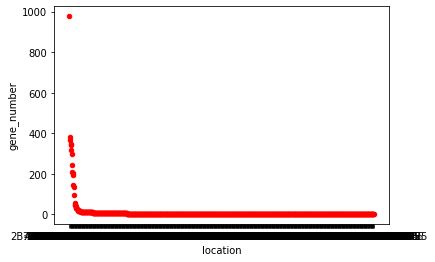

In [160]:
import matplotlib.pyplot as plt
df.plot(kind='scatter',x='location',y='gene_number',color='red')
plt.show()